In [1]:
import os
from particles import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.ndimage as ndimage

from matplotlib import rc

font = {"family": "serif", "weight": "normal", "size": 15}
rc("font", **font)
rc("text", usetex=True)


histo = []

# Particle concentration map
Computes the concentration of the particles compared to the center of a vortex

### Import necessary data

In [ ]:
#Manually input the parameters of the simulation
circulation = 28000
radius = 20000
lmbda = 100
reynolds = circulation*(1-exp(-1.25643))/(2*3.14159*1e-6)
Tc = 4*1.25643*(pi*radius)**2/((1-exp(-1.25643))*circulation)

domain_size = radius*40 #meters

name_files = ["tracer","inertial_t100","inertial_t1000","inertial_t10000","inertial_t100000","inertial_t1000000"]

paths = []

for file in name_files:
    paths.append(Path(r"C:\\Users\\albou\Desktop\\The Ocean Cleanup\\Work\\Simulation\\Analytical simulation\\"+str(circulation)+"_"+str(radius)+"_"+str(lmbda)+"\\"+str(file)))

timestep = Tc/300 #seconds

StokesN = [0,100/Tc,1000/Tc,10000/Tc,100000/Tc,1000000/Tc]

### Plot the time averaged concentration map


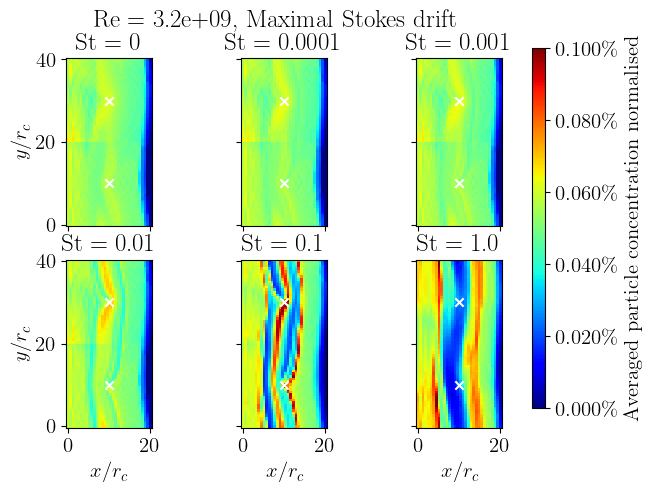

In [ ]:
half_domain = domain_size/2
fig,axs = plt.subplots(2,3,sharex=True, sharey = True)

for i,path in enumerate(paths):

    grid = np.zeros((64,32))
    particles_traj = ReadParticles(os.path.basename(os.path.normpath(path)), path)
    pxs = []
    pys = []
    transitoire_frac = 0.2
    nb_timesteps = len(particles_traj[0].px)

    for t in range(int(nb_timesteps*0.2),nb_timesteps):

        for p,part in enumerate(particles_traj): 
            
            px = ((part.px[t]+half_domain) % half_domain) / half_domain * 32
            py = part.py[t] % (2*half_domain) / (2*half_domain) *64
            pxs.append(px)
            pys.append(py)
            grid[floor(py),floor(px)] += 1

    grid /= int(nb_timesteps*(1-transitoire_frac))

    im =axs[i // 3][i % 3].pcolormesh(np.linspace(0,20,32),np.linspace(0,40,64),grid*100/4096, cmap= 'jet',vmin=0,vmax = 0.1)
    axs[i // 3][i % 3].set_aspect("equal")

    if i // 3 == 1 :

        axs[i // 3][i % 3].set_xlabel("$x/r_c$")

    if i % 3 == 0 :

        axs[i // 3][i % 3].set_ylabel("$y/r_c$")

    axs[i // 3][i % 3].set_title("St = "+str(round(StokesN[i],6-i)))
    axs[i // 3][i % 3].scatter([10,10],[10,30],marker = "x",color = "white")

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.75])
fig.colorbar(im, cax=cbar_ax, label= "Averaged particle concentration normalised", format = matplotlib.ticker.PercentFormatter())

if lmbda == 100 :

    fig.suptitle("Re = "+str("{:.1e}".format(round(reynolds)))+", Maximal Stokes drift")
    
else :

    fig.suptitle("Re = "+str("{:.1e}".format(round(reynolds)))+", Minimal Stokes drift")


### Plot the concentration map at the final moment of the simulation

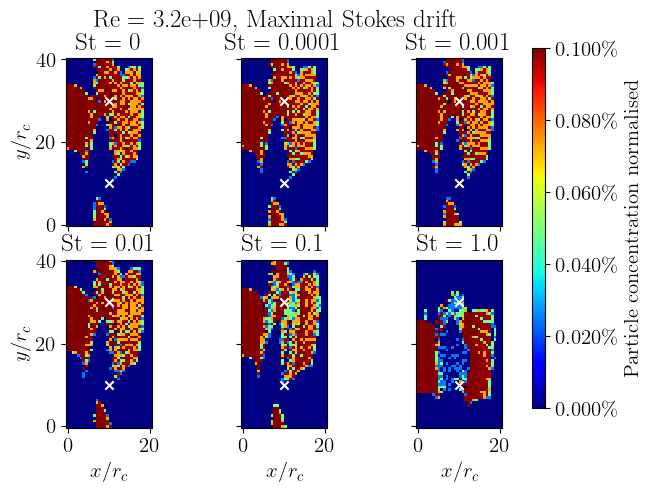

In [ ]:
half_domain = domain_size/2
fig,axs = plt.subplots(2,3,sharex=True, sharey = True)
# plt.subplots_adjust(hspace = 0.4)

for i,path in enumerate(paths):

    grid = np.zeros((64,32))
    particles_traj = ReadParticles(os.path.basename(os.path.normpath(path)), path)
    pxs =[]
    pys = []

    for p,part in enumerate(particles_traj): 
            
        px = ((part.px[-2]+half_domain) % half_domain) / half_domain * 32
        py = part.py[-1] % (2*half_domain) / (2*half_domain) *64
        pxs.append(px)
        pys.append(py)
        grid[floor(py),floor(px)] += 1

    im =axs[i // 3][i % 3].pcolormesh(np.linspace(0,20,32),np.linspace(0,40,64),grid*100/4096, cmap= 'jet',vmin=0,vmax = 0.1)
    axs[i // 3][i % 3].set_aspect("equal")

    if i // 3 == 1 :

        axs[i // 3][i % 3].set_xlabel("$x/r_c$")

    if i % 3 == 0 :

        axs[i // 3][i % 3].set_ylabel("$y/r_c$")

    axs[i // 3][i % 3].set_title("St = "+str(round(StokesN[i],6-i)))
    axs[i // 3][i % 3].scatter([10,10],[10,30],marker = "x",color = "white")

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.75])
fig.colorbar(im, cax=cbar_ax, label= "Particle concentration normalised", format = matplotlib.ticker.PercentFormatter())
plt.colorbar

if lmbda == 100 :

    fig.suptitle("Re = "+str("{:.1e}".format(round(reynolds)))+", Maximal Stokes drift")

else :

    fig.suptitle("Re = "+str("{:.1e}".format(round(reynolds)))+", Minimal Stokes drift")

### Plot the concentration profile (axis aligned with current) 

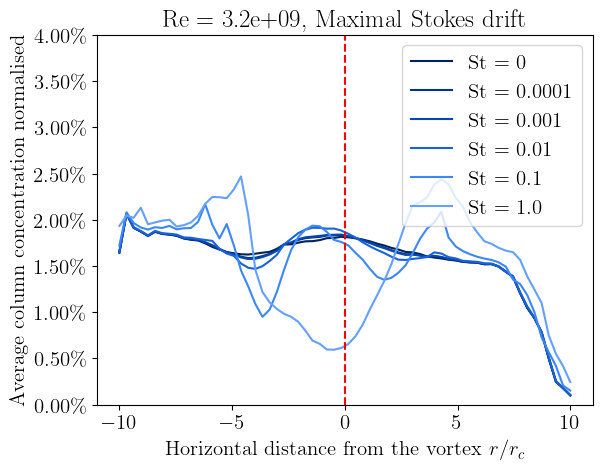

In [ ]:
half_domain = domain_size/2
colors = [(0,34/255,89/255),(0,51/255,133/255),(5/255,71/255,177/255),(26/255,98/255,214/255),(60/255,135/255,247/255),(100/255,160/255,1)]

for i,path in enumerate(paths):

    res = 64
    r_x = np.linspace(-10,10,res)
    particles_traj = ReadParticles(os.path.basename(os.path.normpath(path)), path)
    pxs = []
    pys = []
    transitoire_frac = 0.2
    nb_timesteps = len(particles_traj[0].px)
    distribx = np.zeros((nb_timesteps,res))

    for t in range(int(nb_timesteps*transitoire_frac),nb_timesteps):

        for p,part in enumerate(particles_traj): 

            px = part.px[t] % half_domain / half_domain * res
            py = part.py[t] % half_domain / half_domain * res
            distribx[t][floor(px)] += 1
    
    plt.plot(r_x,np.sum(distribx,axis = 0)*100/(int(nb_timesteps*(1-transitoire_frac))*4096),label = "St = "+str(round(StokesN[i],6-i)),c = colors[i])

plt.xlabel("Horizontal distance from the vortex $r/r_c$")
plt.ylabel("Average column concentration normalised")
plt.ylim(0,4)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

plt.legend(loc = "upper right")
plt.axvline(0,label = "Vortex center",c = "red",ls = "--")

if lmbda == 100 :

    plt.title("Re = "+str("{:.1e}".format(round(reynolds)))+", Maximal Stokes drift")

else :

    plt.title("Re = "+str("{:.1e}".format(round(reynolds)))+", Minimal Stokes drift")